In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

start = '2010-01-01'
end = '2019-12-31'
symbol = 'AAPL'

# Fetch the data
df = yf.download(symbol, start=start, end=end)

# Print the first few rows of the DataFrame
print(df.head())


[*********************100%***********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.496295  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.507527  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.404015  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.392176  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.434675  447610800


In [3]:
print(df.tail())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2019-12-23  70.132500  71.062500  70.092499  71.000000  69.355133   98572000
2019-12-24  71.172501  71.222504  70.730003  71.067497  69.421051   48478800
2019-12-26  71.205002  72.495003  71.175003  72.477501  70.798401   93121200
2019-12-27  72.779999  73.492500  72.029999  72.449997  70.771538  146266000
2019-12-30  72.364998  73.172501  71.305000  72.879997  71.191589  144114400


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800


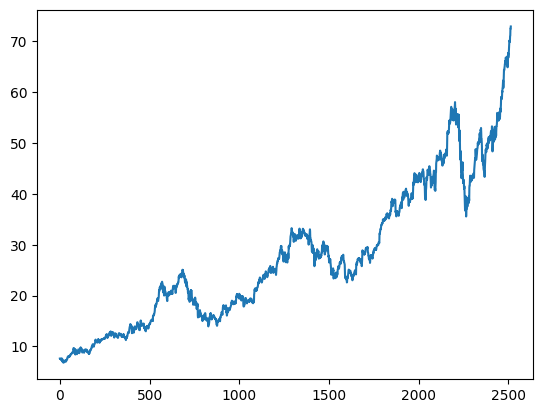

In [5]:
plt.plot(df['Close'])
plt.show()

In [6]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496295,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434675,447610800
...,...,...,...,...,...,...,...
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355133,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421051,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798401,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771538,146266000


In [7]:
ma100 = df['Close'].rolling(100).mean()
ma100


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

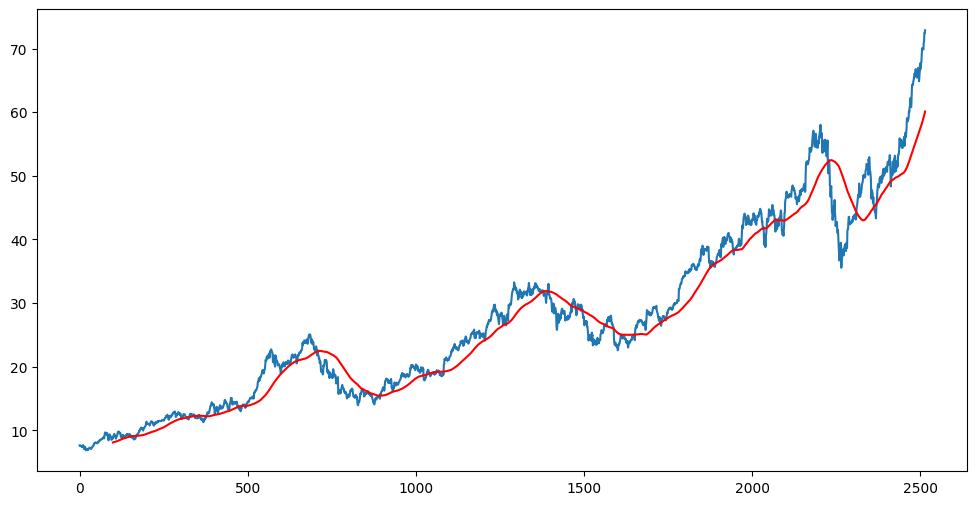

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.plot(ma100, 'r')
plt.show()

In [9]:
ma200 = df['Close'].rolling(100).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

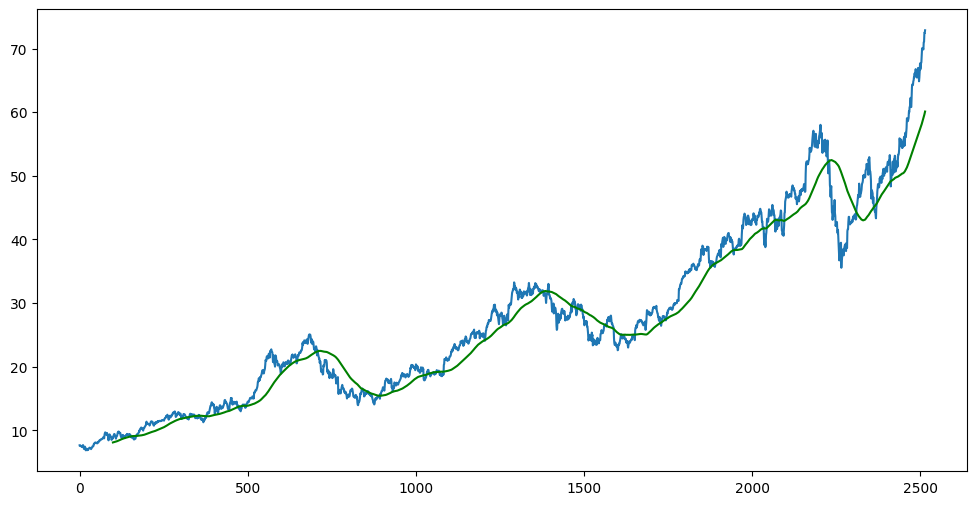

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.plot(ma100, 'g')
plt.show()

In [11]:
df.shape

(2515, 7)

In [12]:
# Splitting Data into Training and Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [13]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [14]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [17]:
data_training_array.shape

(1760, 1)

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0] ):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

# Create a Sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=1, activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(rate=0.3))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(rate=0.4))
model.add(LSTM(units=70, activation='relu', return_sequences=True))
model.add(Dropout(rate=0.5))
model.add(LSTM(units=80, activation='relu', return_sequences=False))

# Add the final Dense layer
model.add(Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
52/52 [==============================] - 27s 325ms/step - loss: 0.3326
Epoch 2/5
52/52 [==============================] - 16s 316ms/step - loss: 0.3326
Epoch 3/5
52/52 [==============================] - 17s 318ms/step - loss: 0.3326
Epoch 4/5
52/52 [==============================] - 17s 316ms/step - loss: 0.3326
Epoch 5/5
19/52 [=========>....................] - ETA: 10s - loss: 0.3347

In [ ]:
model.summary()

In [ ]:
data_testing.head()

In [ ]:
data_training.tail()

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [ ]:
# Concatenate the dataframes
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
input_data.shape

In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# Making Prediction

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
y_predicted

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [1]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Orignal Price')
plt.plot(y_predicted, 'y', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

NameError: name 'plt' is not defined